In [199]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [200]:
# usando la libreria pandas para la manipulacion y analisis de datos
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [201]:
#Carga de dataset para prediccion
# https://www.kaggle.com/code/yasirabdaali/analysis-on-university-admission-dataset/input?select=adm_data.csv
data = pd.read_csv('datasets/adm_data.csv')

In [202]:
# Mostramos los datos de el dataset cargado
print(data)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chance of Admit   
0           1    

In [203]:
# Mostramos la informacion de los datos del dataset donde podemos ver un elemento tipo object
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [204]:
#Convierte las variables categoricas en numericas en nuestro caso nel dataset no contiene este tipo de variables
columnas_categoricas = data.select_dtypes(include=['object']).columns
# Convierte las variables tipo fechas en numericas
columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [205]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [206]:
# procesamiento de Fechas a numeros
for columna in columnas_fechas:
  data[columna] = pd.to_numeric(data[columna].map(datetime.timestamp))

In [207]:
#Mostramos el resultado despues de procesar fechas a numeros
print(data)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chance of Admit   
0           1    

In [208]:
#Mostramos la informacion del dataset donde podemos ver que todas las columnas son de tipo numerico
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [210]:
# Realizamos la lectura de Datos
# x es igual a las primeras 8 columnas
# y es igual a la columna 9
X = data.iloc[:, :8]
y = data.iloc[:, 8]
m = y.size

In [211]:
# Mostramos los datos x
print(X)
print('*'*100)
print('*'*100)
print('*'*100)
# Mostramos los datos de la columna y
print(y)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  
0           1  
1           1  
2  

In [212]:
#Normalizamos x
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
# Calculamos mu, sigma y la x normalizada
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [213]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('*'*100)
print('*'*100)
print('Media calculada:', mu)
print('*'*100)
print('*'*100)
print('Desviación estandar calculada:', sigma)
print('*'*100)
print('*'*100)
print(X_norm)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  
0           1  
1           1  
2  

In [214]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [215]:
#mostramos x con la columna de 1 añadida
print(X)

[[ 1.         -1.72772608  1.76210664 ...  1.16732114  1.76481828
   0.90911166]
 [ 1.         -1.7190658   0.62765641 ...  1.16732114  0.45515126
   0.90911166]
 [ 1.         -1.71040552 -0.07046681 ...  0.05293342 -1.00563118
   0.90911166]
 ...
 [ 1.          1.71040552  1.15124883 ...  1.16732114  1.42900622
   0.90911166]
 [ 1.          1.7190658  -0.41952842 ...  0.61012728  0.30403584
  -1.09997489]
 [ 1.          1.72772608  1.41304503 ...  0.61012728  1.78160888
   0.90911166]]


In [216]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [217]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [0.72431728 0.01925421 0.0242267  0.02410454 0.01098188 0.00178527
 0.01960488 0.05526398 0.01180152]


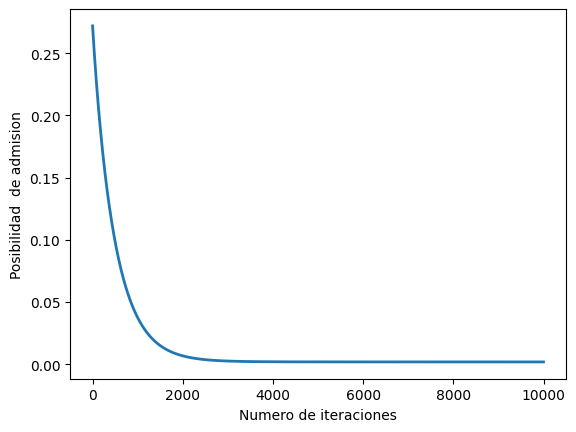

In [218]:
# Elegir algun valor para alpha para lograr la grafica mas indicada
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(9)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Posibilidad  de admision')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))


In [219]:
# Estimar la posibilidad de admision con distintas caracteristicas
# Los datos de x son: [Serual n, puntuacion GRE, puntuacion TOEFL, Calificacion universitaria, declaracion de proposito, recomendacion, CGPA, Investigacion]
X_array = [1, 1,310, 110, 3, 3, 3, 7, 1]
X_array[1:9] = (X_array[1:9] - mu) / sigma
count = np.dot(X_array, theta)

print('El valor predecido para la posibilidad de admision es: {:.4f}'.format(count))

El valor predecido para la posibilidad de admision es: 0.5379
